# Load data

In [55]:
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.colors import LinearSegmentedColormap

red_to_light_green = LinearSegmentedColormap.from_list('RedLightGreen', ['red', 'lightgreen'])

def load_detailed_data(file_path):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    return data

# Treat data

In [56]:
def prepare_plot_data(data, change_index):
    change = data[change_index]
    
    timestamps = np.array(change['timestamp']) + 9 * 3600  
    readable_timestamps = [datetime.datetime.fromtimestamp(ts).strftime('%H:%M:%S.%f')[:-3] for ts in timestamps]
    
    vehicle_focus_vel = np.array(change['vehicle_focus_vel'])
    vehicle_focus_local_y = np.array(change['vehicle_focus_local_y']) * 0.3048  # 英尺转米

    vehicle_before_preceding_vel = np.array(change['vehicle_before_preceding_vel']) if change['before_preceding_id'] != 0 else np.array([])
    vehicle_before_preceding_local_y = np.array(change['vehicle_before_preceding_local_y']) * 0.3048 if change['before_preceding_id'] != 0 else np.array([])
    
    vehicle_before_following_vel = np.array(change['vehicle_before_following_vel']) if change['before_following_id'] != 0 else np.array([])
    vehicle_before_following_local_y = np.array(change['vehicle_before_following_local_y']) * 0.3048 if change['before_following_id'] != 0 else np.array([])
    
    vehicle_after_preceding_vel = np.array(change['vehicle_after_preceding_vel']) if change['after_preceding_id'] != 0 else np.array([])
    vehicle_after_preceding_local_y = np.array(change['vehicle_after_preceding_local_y']) * 0.3048 if change['after_preceding_id'] != 0 else np.array([])
    
    vehicle_after_following_vel = np.array(change['vehicle_after_following_vel']) if change['after_following_id'] != 0 else np.array([])
    vehicle_after_following_local_y = np.array(change['vehicle_after_following_local_y']) * 0.3048 if change['after_following_id'] != 0 else np.array([])
    
    return {
        'timestamps': readable_timestamps,
        'vehicle_focus': (vehicle_focus_local_y, vehicle_focus_vel),
        'before_preceding': (vehicle_before_preceding_local_y, vehicle_before_preceding_vel),
        'before_following': (vehicle_before_following_local_y, vehicle_before_following_vel),
        'after_preceding': (vehicle_after_preceding_local_y, vehicle_after_preceding_vel),
        'after_following': (vehicle_after_following_local_y, vehicle_after_following_vel)
    }

# Set plotting environment

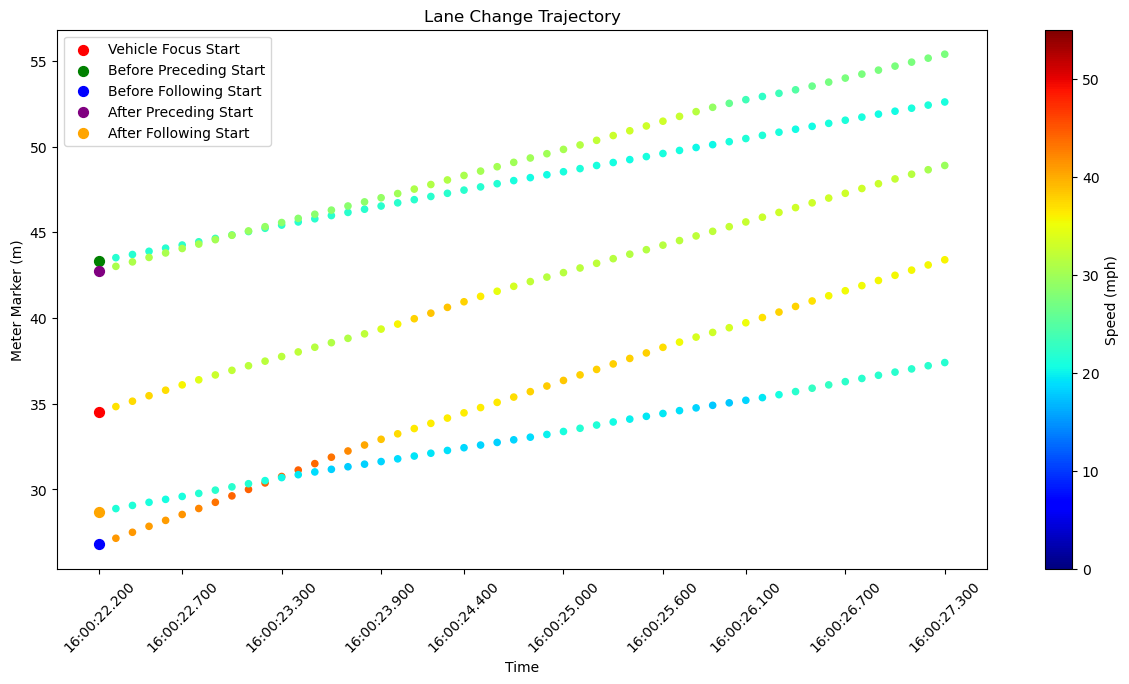

In [57]:
def plot_lane_change(plot_data, vmax=55):
    fig, ax = plt.subplots(figsize=(15, 7))
    colors = ['red', 'green', 'blue', 'purple', 'orange']

    # 绘制变道车辆轨迹
    sc = ax.scatter(plot_data['timestamps'], plot_data['vehicle_focus'][0], c=plot_data['vehicle_focus'][1], cmap='jet', vmin=0, vmax=vmax, s=20)
    ax.scatter(plot_data['timestamps'][0], plot_data['vehicle_focus'][0][0], c=colors[0], s=50, label='Vehicle Focus Start')

    # 绘制前后车辆轨迹
    if len(plot_data['before_preceding'][0]) > 0:
        before_preceding_len = min(len(plot_data['timestamps']), len(plot_data['before_preceding'][0]))
        ax.scatter(plot_data['timestamps'][:before_preceding_len], plot_data['before_preceding'][0][:before_preceding_len], c=plot_data['before_preceding'][1][:before_preceding_len], cmap='jet', vmin=0, vmax=vmax, s=20)
        ax.scatter(plot_data['timestamps'][0], plot_data['before_preceding'][0][0], c=colors[1], s=50, label='Before Preceding Start')
    
    if len(plot_data['before_following'][0]) > 0:
        before_following_len = min(len(plot_data['timestamps']), len(plot_data['before_following'][0]))
        ax.scatter(plot_data['timestamps'][:before_following_len], plot_data['before_following'][0][:before_following_len], c=plot_data['before_following'][1][:before_following_len], cmap='jet', vmin=0, vmax=vmax, s=20)
        ax.scatter(plot_data['timestamps'][0], plot_data['before_following'][0][0], c=colors[2], s=50, label='Before Following Start')
    
    if len(plot_data['after_preceding'][0]) > 0:
        after_preceding_len = min(len(plot_data['timestamps']), len(plot_data['after_preceding'][0]))
        ax.scatter(plot_data['timestamps'][:after_preceding_len], plot_data['after_preceding'][0][:after_preceding_len], c=plot_data['after_preceding'][1][:after_preceding_len], cmap='jet', vmin=0, vmax=vmax, s=20)
        ax.scatter(plot_data['timestamps'][0], plot_data['after_preceding'][0][0], c=colors[3], s=50, label='After Preceding Start')
    
    if len(plot_data['after_following'][0]) > 0:
        after_following_len = min(len(plot_data['timestamps']), len(plot_data['after_following'][0]))
        ax.scatter(plot_data['timestamps'][:after_following_len], plot_data['after_following'][0][:after_following_len], c=plot_data['after_following'][1][:after_following_len], cmap='jet', vmin=0, vmax=vmax, s=20)
        ax.scatter(plot_data['timestamps'][0], plot_data['after_following'][0][0], c=colors[4], s=50, label='After Following Start')

    # 设置x轴为可读格式
    ax.set_xticks(np.linspace(0, len(plot_data['timestamps']) - 1, num=10, dtype=int))
    ax.set_xticklabels(np.array(plot_data['timestamps'])[np.linspace(0, len(plot_data['timestamps']) - 1, num=10, dtype=int)], rotation=45)

    ax.set_xlabel('Time')
    ax.set_ylabel('Meter Marker (m)')
    ax.set_title('Lane Change Trajectory')
    ax.legend()

    # 添加颜色映射条
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Speed (mph)')

    plt.show()

# 加载和准备数据
detailed_file = 'trajectories-0400-0415-detailed-lane-change.json'
data = load_detailed_data(detailed_file)
change_index = 50
plot_data = prepare_plot_data(data, change_index)

# 绘图
plot_lane_change(plot_data)